In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('air_quality_data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [5]:
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [9]:
for column in data.columns:
    data[column].dropna(inplace=True)

In [8]:
data['month'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
35059    False
35060    False
35061    False
35062    False
35063    False
Name: month, Length: 35064, dtype: bool

# Missing values

In [58]:

missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


I have used mean as it was numerical data and mean because firslty i remove the outlier by using the quartile approach then in this case it make our data precise

In [74]:
data['TEMP'] = data['TEMP'].fillna(data['TEMP'].mean())
data['PRES'] = data['PRES'].fillna(data['PRES'].mean())
data['DEWP'] = data['DEWP'].fillna(data['DEWP'].mean())
data.to_csv('outliers', index=False)

# Outlier by using quartile approach

In [52]:
import pandas as pd


data = pd.read_csv("air_quality_data.csv")

num_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "RAIN", "WSPM"]

for col in num_cols:
    if data[col].skew() < 1:
        data[col] = data[col].fillna(data[col].mean()).astype(int)
    else:
        data[col] = data[col].fillna(data[col].median()).astype(int)


if 'wd' in data.columns:
    data['wd'] = data['wd'].fillna(data['wd'].mode()[0])

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)
outlier_counts = {col: detect_outliers_iqr(data, col) for col in num_cols}


print(outlier_counts)
data.to_csv('outliers', index=False)

{'PM2.5': 1768, 'PM10': 1151, 'SO2': 3054, 'NO2': 566, 'CO': 2607, 'O3': 1490, 'RAIN': 450, 'WSPM': 233}


In [37]:

print("Unique wind directions:", data['wd'].unique())

print("Unique stations:", data['station'].unique())


Unique wind directions: ['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW']
Unique stations: ['Aotizhongxin']


In [75]:

data['wd'] = data['wd'].replace({'NNW': 'NW', 'NNE': 'NE', 'ENE': 'NE',
                                  'ESE': 'SE', 'SSW': 'SW', 'WNW': 'NW', 'SSE': 'SE','WSW':'SW'})

data = data.dropna(subset=['wd'])
data.to_csv('outliers.csv')

In [46]:
print("Unique wind directions:", data['wd'].unique())


print("Unique stations:", data['station'].unique())


Unique wind directions: ['NW' 'N' 'NE' 'E' 'W' 'SW' 'SE' 'S']
Unique stations: ['Aotizhongxin']


In [59]:
print("Unique month :", data['month'].unique())
print("Unique year :", data['year'].unique())
print("Unique pm2.5:", data['PM2.5'].unique().shape[0])
print("Unique pm10:", data['PM10'].unique())


Unique month : [ 3  4  5  6  7  8  9 10 11 12  1  2]
Unique year : [2013 2014 2015 2016 2017]
Unique pm2.5: 532
Unique pm10: [  4   8   7   6   3   5   9  15  19  23  20  14  17  18  24  13  11  10
  29  30  33  35  40  46  58  79  86  96 103 113 120 130 132 129 136 135
 142 116 110 119 122 117 108 134 106 114 100  82  71 175 181 105  94  83
  80  62  34  32  36  28  12  44  63  84  85  91 127 151 153 145 146 147
 159 177 184 193 182 171 186 218 248 255 244 252 253 269 315 300 265 229
 203 194 196 205 198 212 219 233 277 285 276 291 338 396 380 335 360 319
 297 294 293 304 337 366 374 344 282 311 283 284 326 310 257 287 298 377
 452 426 389 370 400 373 345 346 327 318 371 844 362 225 348 508 128 123
 104  87 102  67  97 125 118 143 139 166 272 587 628 662 443 263 251 107
  16  25  21  74  75  59  56  52  54 115 140 156 138 155 207 189 133 162
 214 246 124 161 237 165 121  90  93 131 101  31  50  22  38  47  39  45
  88  66  53  77  81  95 112 126 137 158 179 176 211 200 170 174 185 331

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  int64  
 6   PM10     35064 non-null  int64  
 7   SO2      35064 non-null  int64  
 8   NO2      35064 non-null  int64  
 9   CO       35064 non-null  int64  
 10  O3       35064 non-null  int64  
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35064 non-null  int64  
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  int64  
 17  station  35064 non-null  object 
dtypes: float64(3), int64(13), object(2)
memory usage: 4.8+ MB


# Air Quality Index

In [63]:

data['air_quality_index'] = (data['PM2.5'] + data['PM10'] + data['NO2'] + data['O3']) / 4


def categorize_aqi(aqi):
    if aqi <= 50:
        return "Good"
    elif 50 < aqi <= 100:
        return "Moderate"
    else:
        return "Unhealthy"

data['pollution_level'] = data['air_quality_index'].apply(categorize_aqi)


print(data[['air_quality_index', 'pollution_level']].head())
data.to_csv('outliers.csv')

   air_quality_index pollution_level
0              23.00            Good
1              25.00            Good
2              24.25            Good
3              23.75            Good
4              22.50            Good


In [64]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,air_quality_index,pollution_level
0,1,2013,3,1,0,4,4,4,7,300,77,-0.7,1023.0,-18.8,0,NNW,4,Aotizhongxin,23.00,Good
1,2,2013,3,1,1,8,8,4,7,300,77,-1.1,1023.2,-18.2,0,N,4,Aotizhongxin,25.00,Good
2,3,2013,3,1,2,7,7,5,10,300,73,-1.1,1023.5,-18.2,0,NNW,5,Aotizhongxin,24.25,Good
3,4,2013,3,1,3,6,6,11,11,300,72,-1.4,1024.5,-19.4,0,NW,3,Aotizhongxin,23.75,Good
4,5,2013,3,1,4,3,3,12,12,300,72,-2.0,1025.2,-19.5,0,N,2,Aotizhongxin,22.50,Good


# Season and weekend

In [68]:
def get_season(month):
    if month in [12, 1, 2]:  # December - February
        return "Winter"
    elif month in [3, 4, 5]:  # March - May
        return "Spring"
    elif month in [6, 7, 8]:  # June - August
        return "Summer"
    else:  # September - November
        return "Fall"
data['season'] = data['month'].apply(get_season)


print(data[['year', 'month', 'season']].head())


   year  month  season
0  2013      3  Spring
1  2013      3  Spring
2  2013      3  Spring
3  2013      3  Spring
4  2013      3  Spring


In [73]:
import numpy as np

data['weekday'] = np.where(data['day'] % 7 == 6, "Weekend", np.where(data['day'] % 7 == 0, "Weekend", "Weekday"))


data.to_csv('outliers.csv', index=False)


print(data[['day', 'weekday']].head(30))


    day  weekday
0     1  Weekday
1     1  Weekday
2     1  Weekday
3     1  Weekday
4     1  Weekday
5     1  Weekday
6     1  Weekday
7     1  Weekday
8     1  Weekday
9     1  Weekday
10    1  Weekday
11    1  Weekday
12    1  Weekday
13    1  Weekday
14    1  Weekday
15    1  Weekday
16    1  Weekday
17    1  Weekday
18    1  Weekday
19    1  Weekday
20    1  Weekday
21    1  Weekday
22    1  Weekday
23    1  Weekday
24    2  Weekday
25    2  Weekday
26    2  Weekday
27    2  Weekday
28    2  Weekday
29    2  Weekday


# Visualization

Time-Series Plot:

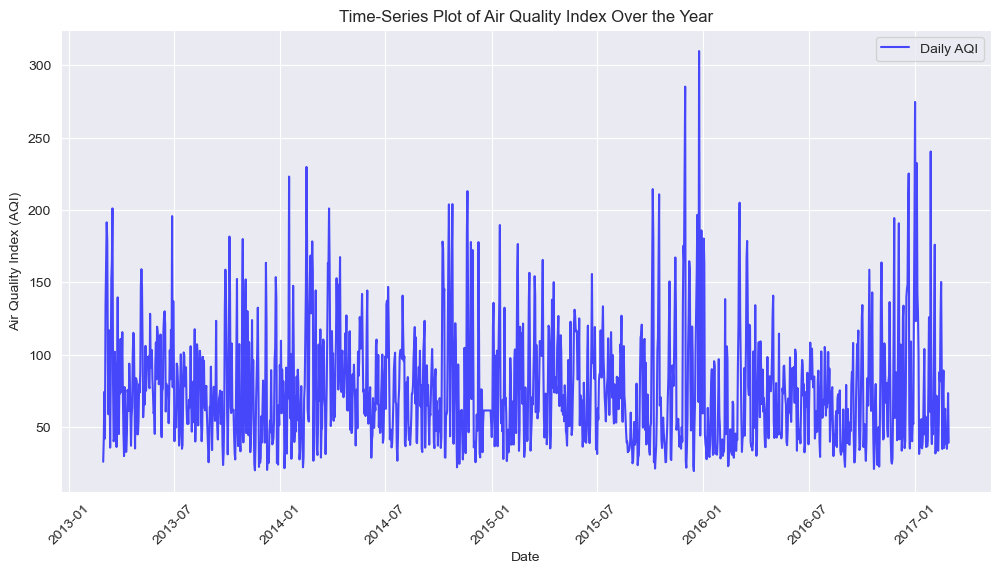

C:\Users\User\AppData\Local\Temp\ipykernel_27664\3593619804.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_aqi.index, y=monthly_aqi.values, palette="coolwarm")


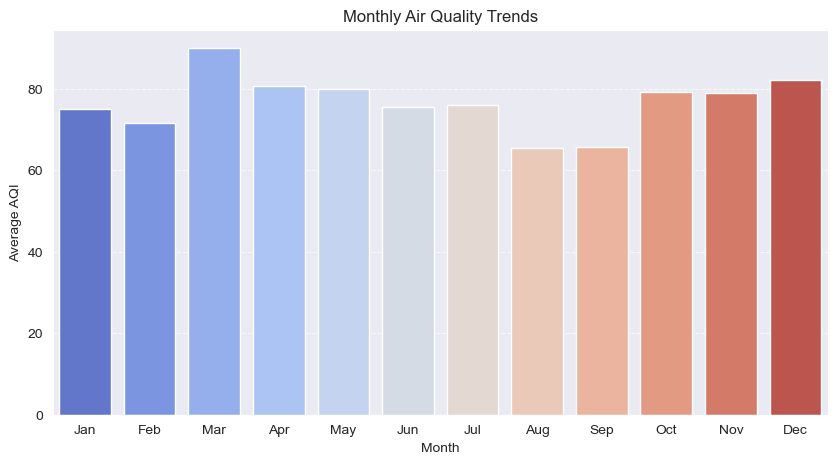

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('outliers.csv')


data["datetime"] = pd.to_datetime(data[["year", "month", "day", "hour"]])


daily_aqi = data.groupby(data["datetime"].dt.date)["air_quality_index"].mean()


plt.figure(figsize=(12, 6))
plt.plot(daily_aqi.index, daily_aqi.values, label="Daily AQI", color="b", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Air Quality Index (AQI)")
plt.title("Time-Series Plot of Air Quality Index Over the Year")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


data["month"] = data["datetime"].dt.month
monthly_aqi = data.groupby("month")["air_quality_index"].mean()


plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_aqi.index, y=monthly_aqi.values, palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.title("Monthly Air Quality Trends")
plt.xticks(range(0, 12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Pollutant Comparison:

C:\Users\User\AppData\Local\Temp\ipykernel_27664\2600312717.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="season", y=pollutant, data=df, palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_27664\2600312717.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="season", y=pollutant, data=df, palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_27664\2600312717.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="season", y=pollutant, data=df, palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_27664\260031271

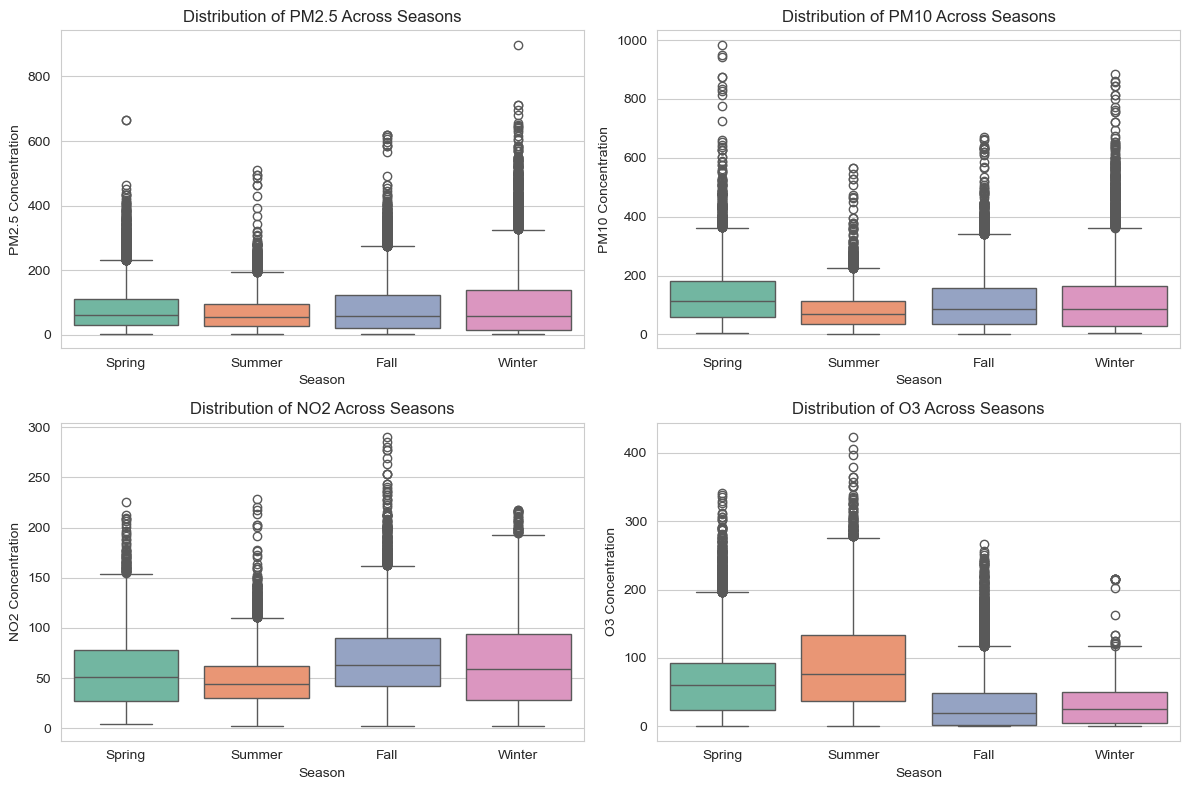

In [2]:
pollutants = ["PM2.5", "PM10", "NO2", "O3"]


plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")


for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="season", y=pollutant, data=data, palette="Set2")
    plt.title(f"Distribution of {pollutant} Across Seasons")
    plt.xlabel("Season")
    plt.ylabel(f"{pollutant} Concentration")

plt.tight_layout()
plt.show()

PM2.5, PM10, and NO2 peak in winter, likely due to heating activities and stagnant air.

O3 is highest in summer due to stronger sunlight driving photochemical reactions.

Lower levels of PM and NO2 in summer suggest better air dispersion.

These seasonal trends can help in planning effective pollution control measures.

## Weather Impact on Air Quality:

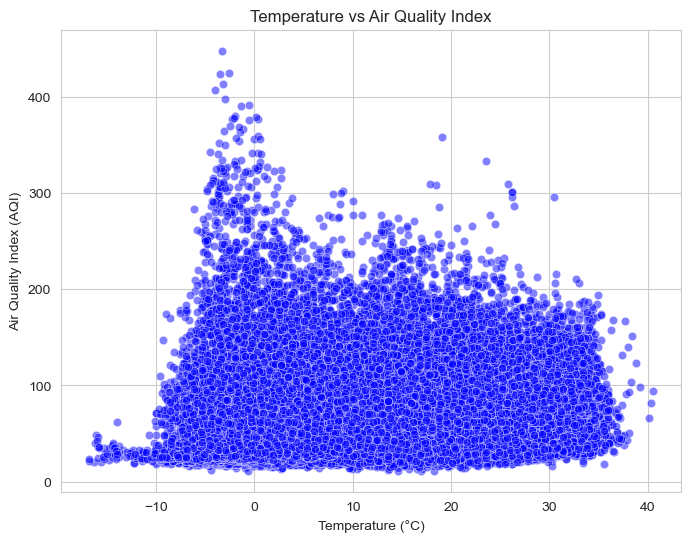

In [3]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["TEMP"], y=data["air_quality_index"], alpha=0.5, color="blue")
plt.title("Temperature vs Air Quality Index")
plt.xlabel("Temperature (°C)")
plt.ylabel("Air Quality Index (AQI)")
plt.grid(True)


plt.show()

There appears to be a negative correlation between temperature and air quality index (AQI).

Higher temperatures are generally associated with lower AQI values, indicating better air quality.

Lower temperatures coincide with higher AQI values, likely due to increased pollution from heating activities and poor atmospheric dispersion in colder months. ​

## Pollution Level Analysis:

C:\Users\User\AppData\Local\Temp\ipykernel_27664\2952789560.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette=['green', 'orange', 'red'])


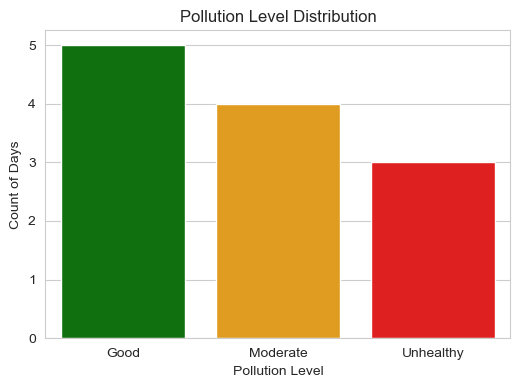

In [5]:
from collections import Counter

pollution_data = ['Good', 'Moderate', 'Unhealthy', 'Good', 'Moderate', 'Moderate',
                  'Unhealthy', 'Good', 'Good', 'Moderate', 'Unhealthy', 'Good']


pollution_counts = Counter(pollution_data)


categories = list(pollution_counts.keys())
counts = list(pollution_counts.values())


plt.figure(figsize=(6, 4))
sns.barplot(x=categories, y=counts, palette=['green', 'orange', 'red'])

plt.xlabel('Pollution Level')
plt.ylabel('Count of Days')
plt.title('Pollution Level Distribution')
plt.show()

The "Good" category appears most frequently, indicating that air quality was generally favorable on most days.
The "Moderate" category occurs slightly less than "Good," suggesting occasional pollution but not at alarming levels.
The "Unhealthy" category appears the least, which is a positive sign as it suggests fewer days with hazardous air quality.

## Monthly Air Quality Patterns:

C:\Users\User\AppData\Local\Temp\ipykernel_27664\2166186331.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="month", y="air_quality_index", data=df, palette="coolwarm")


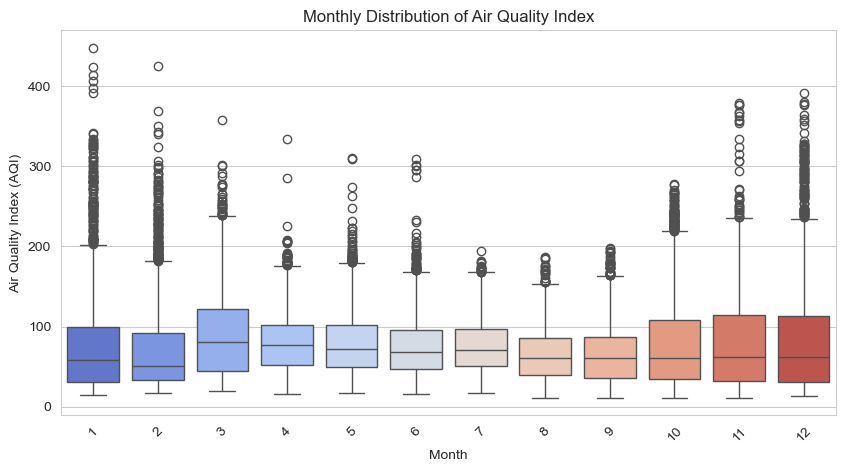

In [8]:
data["month"] = pd.Categorical(data["month"], categories=sorted(data["month"].unique()), ordered=True)
data["air_quality_index"] = pd.to_numeric(data["air_quality_index"], errors='coerce')

# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x="month", y="air_quality_index", data=data, palette="coolwarm")


plt.xlabel("Month")
plt.ylabel("Air Quality Index (AQI)")
plt.title("Monthly Distribution of Air Quality Index")
plt.xticks(rotation=45)
plt.show()

Seasonal Trends: Some months may show higher median AQI values, indicating periods of poor air quality (e.g., winter months due to increased emissions).

Variability: Wider interquartile ranges (IQR) in certain months suggest greater fluctuations in pollution levels.

Anomalies: Outliers (dots beyond whiskers) indicate extreme pollution spikes, possibly due to weather conditions or pollution events.